In [1]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys

Using TensorFlow backend.


In [2]:
# Augment data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory
train_generator = train_datagen.flow_from_directory("./train/", target_size=(150,150), batch_size=32, class_mode="categorical")
val_generator = val_datagen.flow_from_directory("./val/", target_size=(150,150), batch_size=32, class_mode="categorical")

Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [36]:

# Model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.50))

model.add(layers.Conv2D(16, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.50))

model.add(layers.Conv2D(8, (3,3), activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.50))

model.add(layers.Flatten())
model.add(layers.Dense(500, activation="relu"))
model.add(layers.Dropout(0.50))

model.add(layers.Dense(3, activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-5), metrics=["acc"])

history = model.fit_generator(train_generator, steps_per_epoch=48, epochs=500, validation_data=val_generator, validation_steps=24)

#save model
model.save("./trained_models/2st_model.h5")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 8)         1160      
__________

48/48 [==============================] - 2s 44ms/step - loss: 1.0828 - acc: 0.4152 - val_loss: 1.0971 - val_acc: 0.3482
Epoch 48/500
48/48 [==============================] - 2s 45ms/step - loss: 1.0923 - acc: 0.3979 - val_loss: 1.0969 - val_acc: 0.3398
Epoch 49/500
48/48 [==============================] - 2s 44ms/step - loss: 1.0653 - acc: 0.4374 - val_loss: 1.0958 - val_acc: 0.3822
Epoch 50/500
48/48 [==============================] - 2s 44ms/step - loss: 1.0652 - acc: 0.4468 - val_loss: 1.0970 - val_acc: 0.3477
Epoch 51/500
48/48 [==============================] - 2s 44ms/step - loss: 1.0606 - acc: 0.4395 - val_loss: 1.0961 - val_acc: 0.3743
Epoch 52/500
48/48 [==============================] - 2s 44ms/step - loss: 1.0736 - acc: 0.4041 - val_loss: 1.0956 - val_acc: 0.3802
Epoch 53/500
48/48 [==============================] - 2s 44ms/step - loss: 1.0705 - acc: 0.4301 - val_loss: 1.0957 - val_acc: 0.3743
Epoch 54/500
48/48 [==============================] - 2s 44ms/step - loss: 1.0675 

48/48 [==============================] - 2s 45ms/step - loss: 0.8814 - acc: 0.5876 - val_loss: 1.0223 - val_acc: 0.4727
Epoch 109/500
48/48 [==============================] - 2s 45ms/step - loss: 0.8881 - acc: 0.5927 - val_loss: 0.9983 - val_acc: 0.5550
Epoch 110/500
48/48 [==============================] - 2s 46ms/step - loss: 0.8809 - acc: 0.5706 - val_loss: 1.0125 - val_acc: 0.4961
Epoch 111/500
48/48 [==============================] - 2s 45ms/step - loss: 0.8764 - acc: 0.6046 - val_loss: 1.0073 - val_acc: 0.5170
Epoch 112/500
48/48 [==============================] - 2s 45ms/step - loss: 0.8897 - acc: 0.5917 - val_loss: 1.0023 - val_acc: 0.5260
Epoch 113/500
48/48 [==============================] - 2s 47ms/step - loss: 0.8790 - acc: 0.5980 - val_loss: 1.0044 - val_acc: 0.5157
Epoch 114/500
48/48 [==============================] - 2s 44ms/step - loss: 0.8480 - acc: 0.6134 - val_loss: 1.0024 - val_acc: 0.5273
Epoch 115/500
48/48 [==============================] - 2s 46ms/step - loss: 

48/48 [==============================] - 2s 44ms/step - loss: 0.7697 - acc: 0.6592 - val_loss: 0.9386 - val_acc: 0.6042
Epoch 170/500
48/48 [==============================] - 2s 43ms/step - loss: 0.7420 - acc: 0.6747 - val_loss: 0.9604 - val_acc: 0.5864
Epoch 171/500
48/48 [==============================] - 2s 44ms/step - loss: 0.7864 - acc: 0.6703 - val_loss: 0.9371 - val_acc: 0.5872
Epoch 172/500
48/48 [==============================] - 2s 43ms/step - loss: 0.7353 - acc: 0.6875 - val_loss: 0.9605 - val_acc: 0.5589
Epoch 173/500
48/48 [==============================] - 2s 44ms/step - loss: 0.7505 - acc: 0.6658 - val_loss: 0.9293 - val_acc: 0.6107
Epoch 174/500
48/48 [==============================] - 2s 44ms/step - loss: 0.7720 - acc: 0.6700 - val_loss: 0.9421 - val_acc: 0.5969
Epoch 175/500
48/48 [==============================] - 2s 43ms/step - loss: 0.7535 - acc: 0.6625 - val_loss: 0.9485 - val_acc: 0.5651
Epoch 176/500
48/48 [==============================] - 2s 44ms/step - loss: 

48/48 [==============================] - 2s 44ms/step - loss: 0.6965 - acc: 0.6963 - val_loss: 0.9057 - val_acc: 0.6146
Epoch 231/500
48/48 [==============================] - 2s 44ms/step - loss: 0.7043 - acc: 0.6933 - val_loss: 0.9013 - val_acc: 0.6178
Epoch 232/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6904 - acc: 0.7030 - val_loss: 0.9157 - val_acc: 0.6029
Epoch 233/500
48/48 [==============================] - 2s 43ms/step - loss: 0.7206 - acc: 0.6850 - val_loss: 0.9141 - val_acc: 0.6047
Epoch 234/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6849 - acc: 0.7090 - val_loss: 0.9149 - val_acc: 0.6042
Epoch 235/500
48/48 [==============================] - 2s 43ms/step - loss: 0.6878 - acc: 0.7111 - val_loss: 0.9134 - val_acc: 0.5916
Epoch 236/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6977 - acc: 0.6938 - val_loss: 0.9029 - val_acc: 0.6315
Epoch 237/500
48/48 [==============================] - 2s 44ms/step - loss: 

48/48 [==============================] - 2s 44ms/step - loss: 0.6439 - acc: 0.7392 - val_loss: 0.8844 - val_acc: 0.6387
Epoch 292/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6467 - acc: 0.7198 - val_loss: 0.8757 - val_acc: 0.6393
Epoch 293/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6809 - acc: 0.7101 - val_loss: 0.8912 - val_acc: 0.6099
Epoch 294/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6396 - acc: 0.7344 - val_loss: 0.8873 - val_acc: 0.6302
Epoch 295/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6545 - acc: 0.7227 - val_loss: 0.8803 - val_acc: 0.6296
Epoch 296/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6597 - acc: 0.7214 - val_loss: 0.8881 - val_acc: 0.6081
Epoch 297/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6589 - acc: 0.7119 - val_loss: 0.8764 - val_acc: 0.6374
Epoch 298/500
48/48 [==============================] - 2s 44ms/step - loss: 

48/48 [==============================] - 2s 44ms/step - loss: 0.6215 - acc: 0.7336 - val_loss: 0.8711 - val_acc: 0.6243
Epoch 353/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6119 - acc: 0.7465 - val_loss: 0.8724 - val_acc: 0.6198
Epoch 354/500
48/48 [==============================] - 2s 44ms/step - loss: 0.5992 - acc: 0.7496 - val_loss: 0.8491 - val_acc: 0.6427
Epoch 355/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6193 - acc: 0.7425 - val_loss: 0.8553 - val_acc: 0.6237
Epoch 356/500
48/48 [==============================] - 2s 43ms/step - loss: 0.6082 - acc: 0.7514 - val_loss: 0.8498 - val_acc: 0.6374
Epoch 357/500
48/48 [==============================] - 2s 44ms/step - loss: 0.6178 - acc: 0.7396 - val_loss: 0.8647 - val_acc: 0.6146
Epoch 358/500
48/48 [==============================] - 2s 45ms/step - loss: 0.6141 - acc: 0.7459 - val_loss: 0.8462 - val_acc: 0.6453
Epoch 359/500
48/48 [==============================] - 2s 44ms/step - loss: 

48/48 [==============================] - 2s 43ms/step - loss: 0.5619 - acc: 0.7769 - val_loss: 0.8491 - val_acc: 0.6348
Epoch 414/500
48/48 [==============================] - 2s 43ms/step - loss: 0.6129 - acc: 0.7442 - val_loss: 0.8215 - val_acc: 0.6471
Epoch 415/500
48/48 [==============================] - 2s 43ms/step - loss: 0.5968 - acc: 0.7544 - val_loss: 0.8433 - val_acc: 0.6558
Epoch 416/500
48/48 [==============================] - 2s 43ms/step - loss: 0.5946 - acc: 0.7633 - val_loss: 0.8362 - val_acc: 0.6393
Epoch 417/500
48/48 [==============================] - 2s 43ms/step - loss: 0.5717 - acc: 0.7722 - val_loss: 0.8349 - val_acc: 0.6427
Epoch 418/500
48/48 [==============================] - 2s 43ms/step - loss: 0.5699 - acc: 0.7642 - val_loss: 0.8402 - val_acc: 0.6406
Epoch 419/500
48/48 [==============================] - 2s 43ms/step - loss: 0.5975 - acc: 0.7551 - val_loss: 0.8393 - val_acc: 0.6505
Epoch 420/500
48/48 [==============================] - 2s 43ms/step - loss: 

48/48 [==============================] - 2s 48ms/step - loss: 0.5496 - acc: 0.7853 - val_loss: 0.8185 - val_acc: 0.6649
Epoch 475/500
48/48 [==============================] - 2s 46ms/step - loss: 0.5445 - acc: 0.7874 - val_loss: 0.8225 - val_acc: 0.6654
Epoch 476/500
48/48 [==============================] - 2s 45ms/step - loss: 0.5531 - acc: 0.7611 - val_loss: 0.8344 - val_acc: 0.6374
Epoch 477/500
48/48 [==============================] - 2s 46ms/step - loss: 0.5177 - acc: 0.7867 - val_loss: 0.8121 - val_acc: 0.6771
Epoch 478/500
48/48 [==============================] - 2s 45ms/step - loss: 0.5572 - acc: 0.7680 - val_loss: 0.8222 - val_acc: 0.6649
Epoch 479/500
48/48 [==============================] - 2s 45ms/step - loss: 0.5416 - acc: 0.7722 - val_loss: 0.8115 - val_acc: 0.6675
Epoch 480/500
48/48 [==============================] - 2s 45ms/step - loss: 0.5476 - acc: 0.7878 - val_loss: 0.8278 - val_acc: 0.6589
Epoch 481/500
48/48 [==============================] - 2s 47ms/step - loss: 

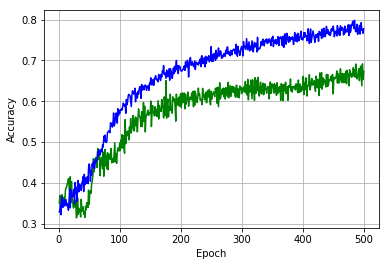

In [90]:
# Graph efficiency
val_acc = history.history["val_acc"]
acc = history.history["acc"]
epochs = range(1, len(acc)+1)

plt.plot(epochs, val_acc, "green", label="Validation")
plt.plot(epochs, acc, "blue", label="Train")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

0.364211
moe_szyslak


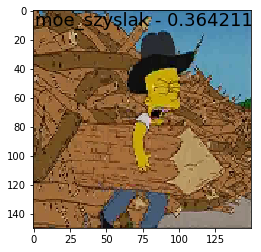

In [89]:
# Predict image
img = image.load_img("./val/bart_simpson/pic_0038.jpg", target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

pred = model.predict_classes(img_tensor)
for key, value in val_generator.class_indices.items():
    if pred[0] == value:
        prediction = key

confidence = 0
for rate in model.predict(img_tensor)[0]:
    if rate >= confidence:
        confidence = rate

print(confidence)
print(prediction)

plt.text(1, 10, "%s - %s"%(prediction, confidence), fontsize=18)
plt.imshow(img_tensor[0])

In [84]:
# Visualize filters
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
first_layer_activation = activations[7]
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

In [88]:
%matplotlib inline